In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('values.csv')
target = pd.read_csv('labels.csv')

In [3]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
target.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


## Calculated Statistic

In [6]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


## Calculating the number of rows and columns 

In [7]:
data.shape

(180, 14)

In [8]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [9]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

#### Finding the duplicates

In [10]:
data.duplicated().value_counts()

False    180
dtype: int64

In [11]:
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [12]:
## Combining the data and target datasets

In [13]:
df = pd.merge(data,target)
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Text(0, 0.5, 'Count')

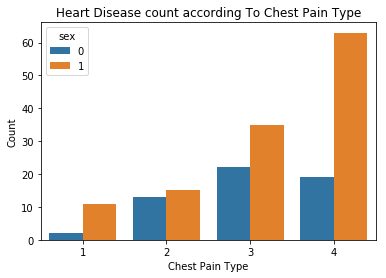

In [14]:
ax = sns.countplot(x = "chest_pain_type",hue = "sex", data = df)
plt.title('Heart Disease count according To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

In [15]:
# From this it can be infered that type 4 chest pain is more common in men(male) and type 3 in case of women(female) 

In [16]:
df["fasting_blood_sugar_gt_120_mg_per_dl"].describe()

count    180.000000
mean       0.161111
std        0.368659
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: float64

In [58]:
sns.barplot(df["fasting_blood_sugar_gt_120_mg_per_dl"],y)

KeyError: 'fasting_blood_sugar_gt_120_mg_per_dl'

In [17]:
# Gender distribution in the dataset
df['sex'].value_counts()

1    124
0     56
Name: sex, dtype: int64

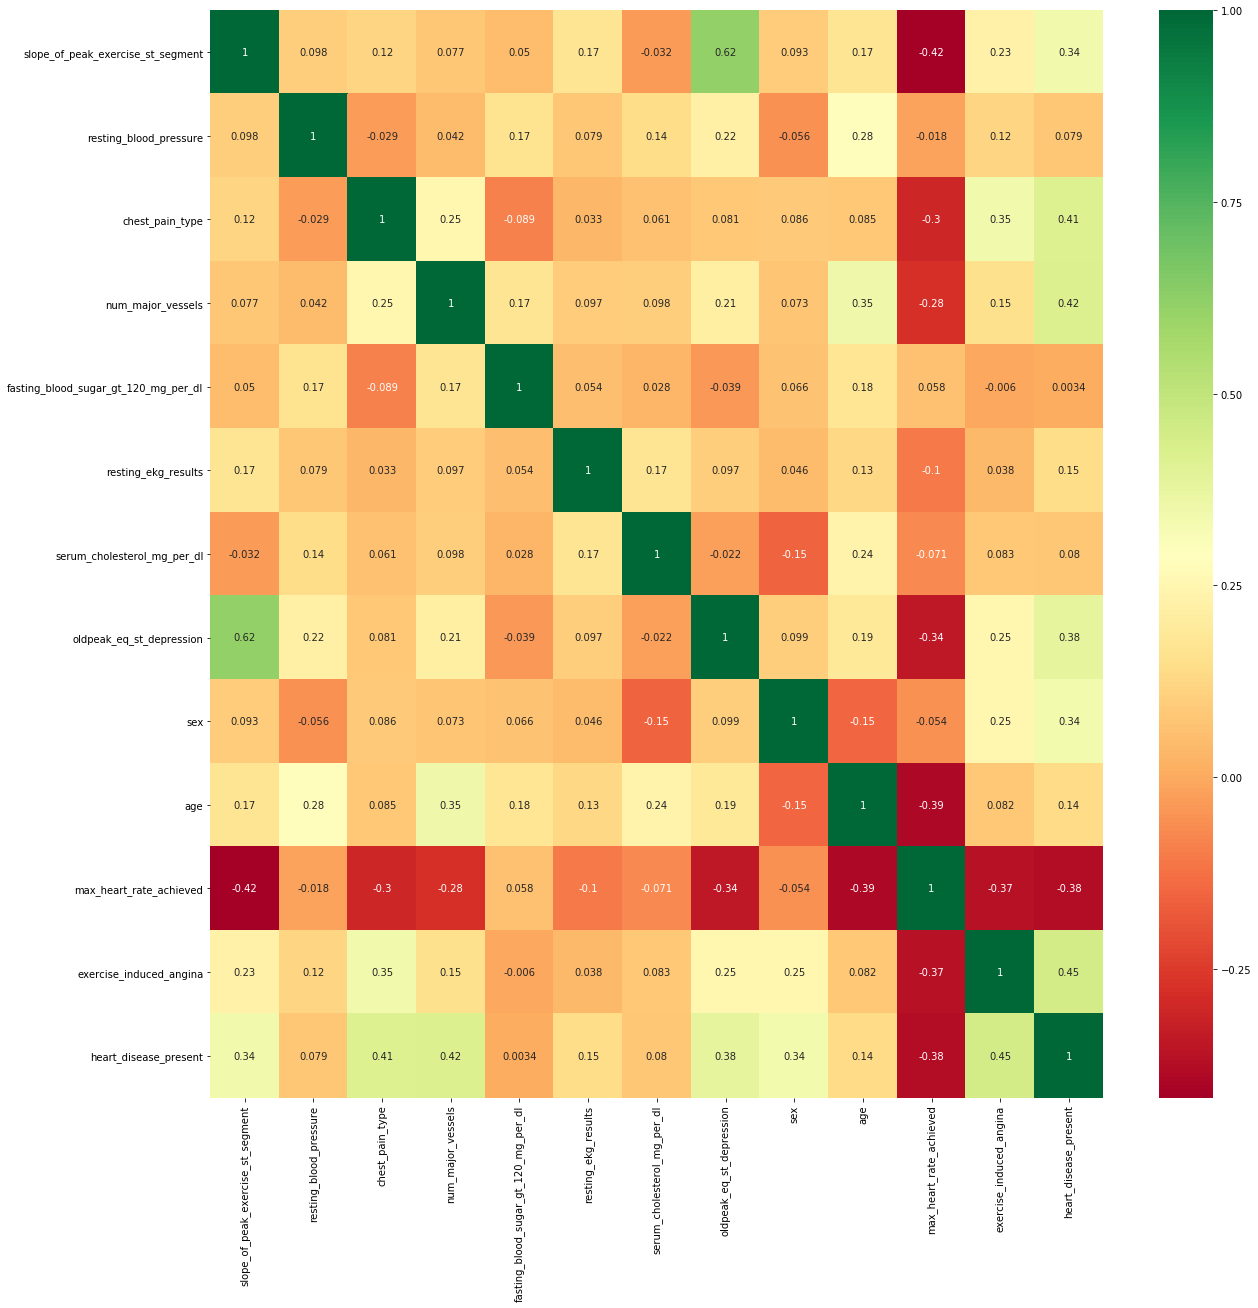

In [18]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap = "RdYlGn")

In [19]:
for columns in df.columns:
    print(columns)

patient_id
slope_of_peak_exercise_st_segment
thal
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina
heart_disease_present


In [20]:
df = df.rename(columns = {'slope_of_peak_exercise_st_segment':'slope','resting_blood_pressure':'restbp','chest_pain_type':'cp','fasting_blood_sugar_gt_120_mg_per_dl':'fbs','resting_ekg_results':'restecg','serum_cholesterol_mg_per_dl':'chol','oldpeak_eq_st_depression':'oldpeak','max_heart_rate_achieved':'maxheartrate','heart_disease_present':'target','exercise_induced_angina':'exang'})
for columns in df.columns:
    print(columns)

patient_id
slope
thal
restbp
cp
num_major_vessels
fbs
restecg
chol
oldpeak
sex
age
maxheartrate
exang
target


In [21]:
## Age Analysis
df.age.value_counts()[:10]

54    12
58    10
64     9
51     9
44     9
57     8
60     7
62     7
59     6
55     6
Name: age, dtype: int64

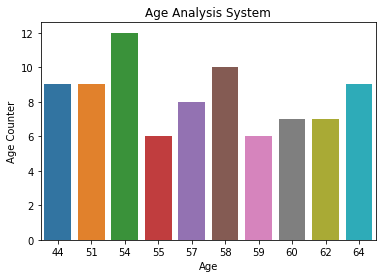

In [22]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [23]:
min_age = min(df.age)
max_age = max(df.age)
mean_age = df.age.mean()
print('Min Age:', min_age)
print('Max Age:', max_age)
print('Mean Age:', mean_age)


Min Age: 29
Max Age: 77
Mean Age: 54.81111111111111


In [24]:
young_age = df[(df.age>29)&(df.age<40)]
middle_age = df[(df.age>=40)&(df.age<55)]
elderly_age = df[(df.age>55)]
print('Young Age:', len(young_age))
print('Middle Age:', len(middle_age))
print('Elderly Age:', len(elderly_age))

Young Age: 7
Middle Age: 78
Elderly Age: 88


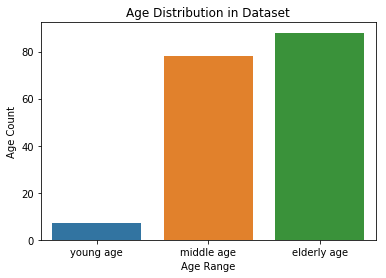

In [25]:
sns.barplot(x=['young age','middle age','elderly age'],y=[len(young_age),len(middle_age),len(elderly_age)])
plt.xlabel('Age Range')
plt.ylabel('Age Count')
plt.title('Age Distribution in Dataset')
plt.show()

## Checking if the dataset is balanced or not

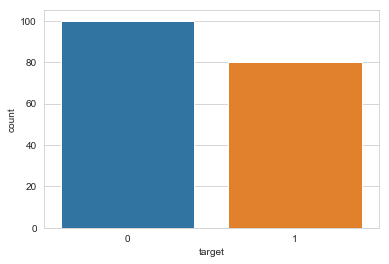

In [26]:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = df)

In [27]:
## We have 100 people without heart disease and 80 people with the heart disease. Hence the dataset is balanced. 
df.head()

,patient_id,slope,thal,restbp,cp,num_major_vessels,fbs,restecg,chol,oldpeak,sex,age,maxheartrate,exang,target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [28]:
df = pd.get_dummies(df, columns = ['sex','cp','restecg','exang','slope','thal','num_major_vessels'])

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age','restbp','chol','oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [30]:
df.head(20)

,patient_id,restbp,fbs,chol,oldpeak,age,maxheartrate,target,sex_0,sex_1,...,slope_1,slope_2,slope_3,thal_fixed_defect,thal_normal,thal_reversible_defect,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3
0,0z64un,-0.195195,0,1.118269,-0.903207,-1.053964,170,0,0,1,...,1,0,0,0,1,0,1,0,0,0
1,ryoo3j,-1.256320,0,-0.669778,0.527616,-0.087134,158,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,yt1s1x,-0.372049,0,1.042182,-0.903207,2.383654,162,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,l2xjde,1.219639,0,-0.498582,-0.903207,-1.591092,181,1,0,1,...,1,0,0,0,0,1,1,0,0,0
4,oyt4ek,2.752375,0,0.395442,2.852703,0.449994,145,0,0,1,...,0,0,1,0,0,1,1,0,0,0
5,ldukkw,-0.077292,0,-1.316518,-0.903207,-1.376241,150,0,0,1,...,1,0,0,0,1,0,1,0,0,0
6,2gbyh9,1.101736,0,0.167180,1.421880,0.557419,157,1,1,0,...,0,1,0,0,0,1,0,0,1,0
7,daa9kp,1.101736,0,0.509572,-0.366648,0.235143,112,1,0,1,...,0,1,0,1,0,0,0,1,0,0
8,3nwy2n,2.280764,0,1.460661,2.137292,0.449994,140,1,0,1,...,0,0,1,0,0,1,1,0,0,0
9,1r508r,-0.666806,0,-0.574669,0.527616,-0.516836,158,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [31]:
df = df.rename(columns = {'slope_of_peak_exercise_st_segment':'slope','resting_blood_pressure':'restbp','chest_pain_type':'cp','fasting_blood_sugar_gt_120_mg_per_dl':'fbs','resting_ekg_results':'restecg','serum_cholesterol_mg_per_dl':'chol','oldpeak_eq_st_depression':'oldpeak','max_heart_rate_achieved':'maxheartrate','heart_disease_present':'target','exercise_induced_angina':'exang'})
for columns in df.columns:
    print(columns)

patient_id
restbp
fbs
chol
oldpeak
age
maxheartrate
target
sex_0
sex_1
cp_1
cp_2
cp_3
cp_4
restecg_0
restecg_1
restecg_2
exang_0
exang_1
slope_1
slope_2
slope_3
thal_fixed_defect
thal_normal
thal_reversible_defect
num_major_vessels_0
num_major_vessels_1
num_major_vessels_2
num_major_vessels_3


In [32]:
df = df.drop(columns=['patient_id','maxheartrate'])


In [33]:
#df.apply(lambda row: row.astype(str).str.contains('237mql').any(), axis=1)

In [34]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [62]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10, shuffle=True )


In [63]:
from sklearn import neighbors 
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [64]:
accuracy = clf.score(X_test,y_test)
accuracy

0.9166666666666666

In [65]:
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

C:\Users\Pragnya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {

In [66]:
model_griddtree.best_params_

{'criterion': 'gini', 'min_samples_split': 4}

In [67]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [68]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.79      0.79      0.79        14

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.82        36
weighted avg       0.83      0.83      0.83        36



In [69]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))


0.8611111111111112
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.80      0.86      0.83        14

    accuracy                           0.86        36
   macro avg       0.85      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\Pragnya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
Y_pred_lr.shape

(36,)

In [46]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.56 %


In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for test set for Random Forest = 0.8888888888888888


### Decision Tree 

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')